In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
#import dataset
heart_df = pd.read_csv('heart.csv')       
heart_df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
# information about the dataset
heart_df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#description about dataset
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_df.shape

(303, 14)

# Checking null values

In [ ]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
heart_df.notnull().sum()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

In [ ]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

# Exploratory Data Analysis(EDA)

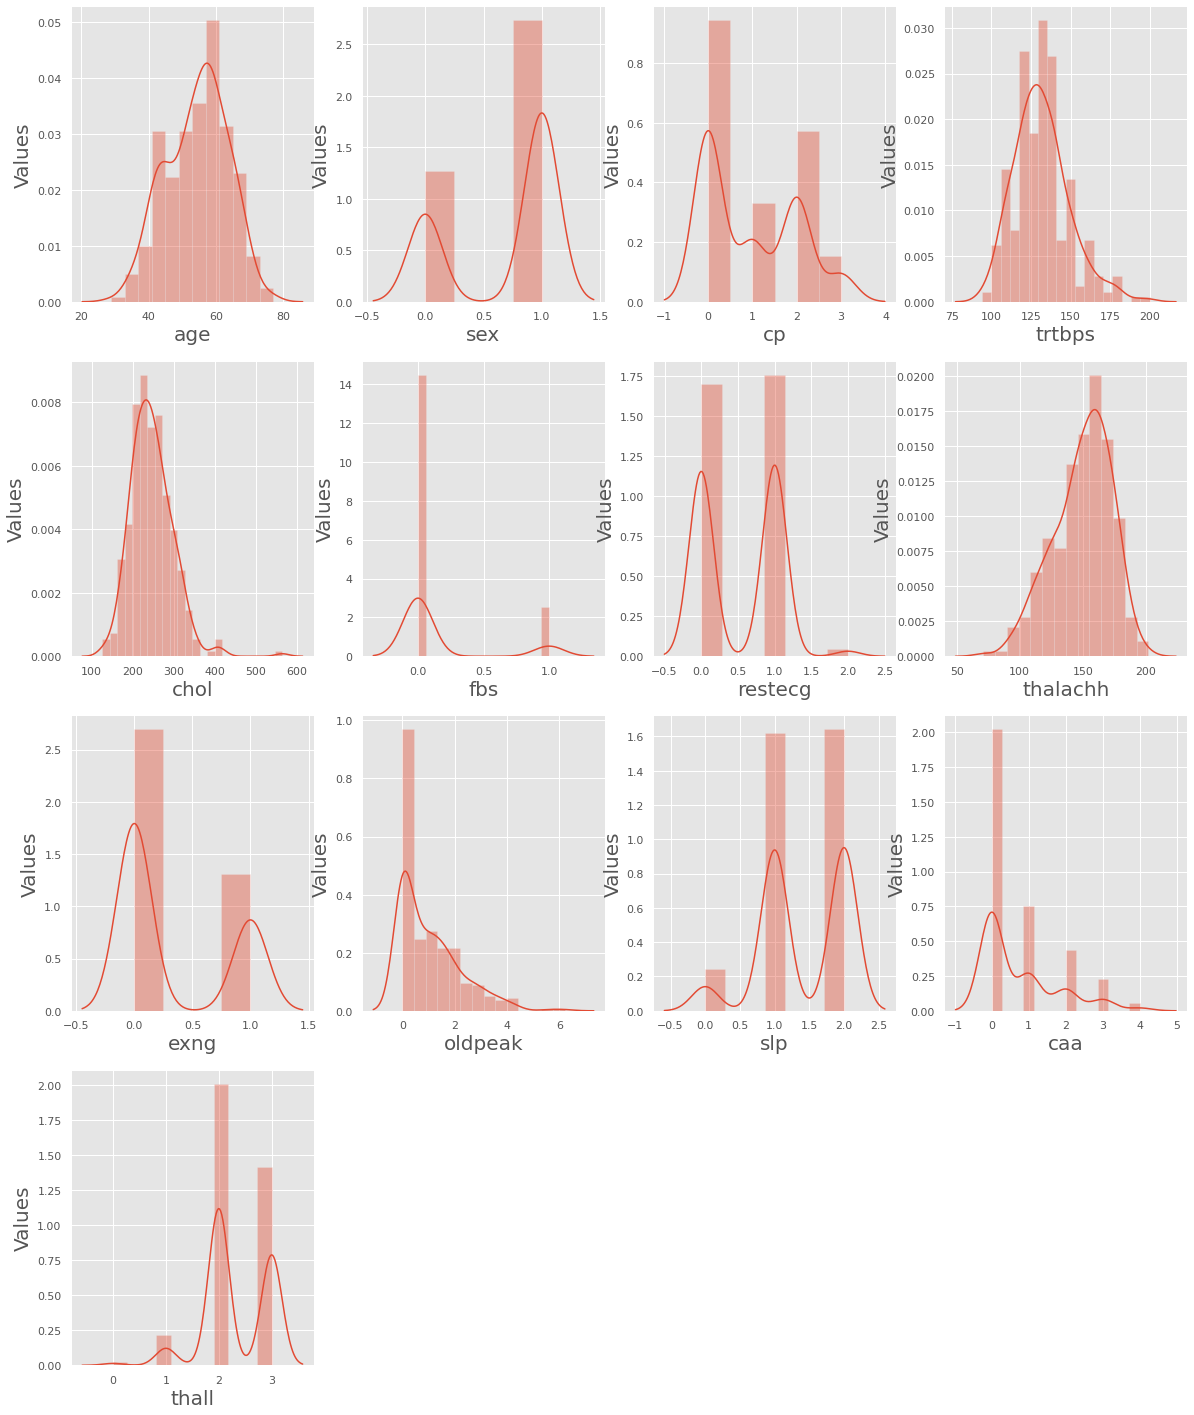

In [ ]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(heart_df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

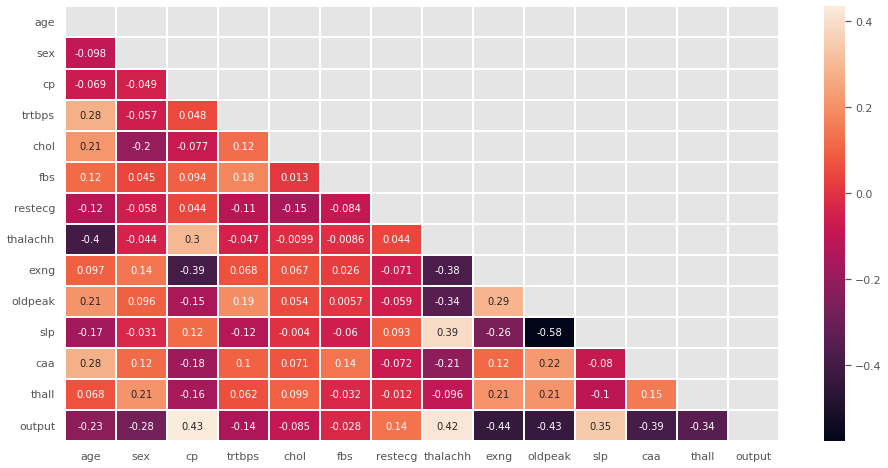

In [ ]:
#Correlation matrix

plt.figure(figsize = (16, 8))

corr = heart_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [ ]:
#checking the variance
heart_df.var()

age           82.484558
sex            0.217166
cp             1.065132
trtbps       307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalachh     524.646406
exng           0.220707
oldpeak        1.348095
slp            0.379735
caa            1.045724
thall          0.374883
output         0.248836
dtype: float64

We can see ,there is a huge variance.So,we should normalise it.

# Normalization

In [ ]:
heart_df['trtbps']=np.log(heart_df['trtbps'])
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalachh']=np.log(heart_df['thalachh'])

np.var(heart_df[["trtbps",'chol','thalachh']])

trtbps      0.000708
chol        0.001378
thalachh    0.027054
dtype: float64

In [ ]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
x=heart_df.drop('output',axis=1)    
y=heart_df['output']

In [ ]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    float64
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 30.9 KB


# Logistic Regression

In [ ]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc=accuracy_score(y_test,y_pred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 85.37735849056604 %
Testing accuracy score of the model is: 80.21978021978022 %


# SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVM']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 55.660377358490564 %
Testing accuracy score of the model is: 51.64835164835166 %


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)

acc3=accuracy_score(y_test,y_pred3)
accuracies['DT']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 72.52747252747253 %


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search = GridSearchCV(dtc, grid_params, cv = 10, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
dtc2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
dtc2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, splitter='random')

In [ ]:
y_pred4 = dtc2.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
accuracies['DT2']=acc4*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc2.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 76.92307692307693 %


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)
gbc.fit(x_train, y_train)

y_pred6 = gbc.predict(x_test)

acc6 = accuracy_score(y_test,y_pred6)
accuracies['GradientBoosting']=acc6*100

print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 79.12087912087912 %


Model Comparison

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree Classifier',  'Gradient Boosting Classifier'],
    'Score': [100*round(acc,4),  100*round(acc2,4), 100*round(acc4,4), 100*round(acc6,4)]
})
models
#models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,80.22
1,SVM,51.65
2,Decision Tree Classifier,76.92
3,Gradient Boosting Classifier,79.12
